In [1]:
!pip install hvplot


# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas
import numpy as np
import seaborn as sns


In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Initialize the `StandardScaler()`
scaler = StandardScaler()

# Normalize the data
scaled_data = scaler.fit_transform(market_data_df)



In [6]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Display sample data
scaled_market_data_df.head(10)


# Add a 'coin_id' column and set it as the index
scaled_market_data_df['coin_id'] = scaled_market_data_df.index
scaled_market_data_df.set_index('coin_id', inplace=True)


# Display sample data
scaled_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, n_init='auto', random_state=1)
    
    # Fit the model to the data using the scaled DataFrame
    kmeans_model.fit(scaled_market_data_df)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


# Create a dictionary with the data to plot the Elbow curve

elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


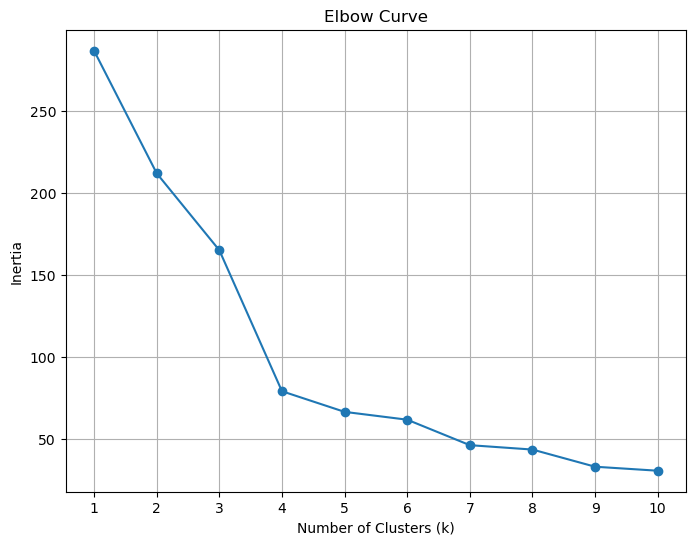

In [8]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the Elbow Curve
# Plot the DataFrame
# Plot the Elbow Curve using the Elbow DataFrame
plt.figure(figsize=(8, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o')
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(elbow_df["k"])
plt.grid(True)
plt.show()


In [9]:
# Calculate the percentage change correctly
elbow_df["percentage_change"] = elbow_df["inertia"].diff() / elbow_df["inertia"].shift(1) * 100

# Since we're looking for the point with the largest drop, take the absolute value
elbow_df["percentage_change"] = elbow_df["percentage_change"].abs()

# Display the updated DataFrame
print(elbow_df)

# Find the largest percentage change
max_change_index = elbow_df["percentage_change"].idxmax()
optimal_k = elbow_df.loc[max_change_index, "k"]

# Print the optimal k value
print(f"The optimal number of clusters (k) is: {optimal_k}")





    k     inertia  percentage_change
0   1  287.000000                NaN
1   2  212.123342          26.089428
2   3  165.136752          22.150598
3   4   79.022435          52.147275
4   5   66.413051          15.956715
5   6   61.634088           7.195819
6   7   46.074467          25.245154
7   8   43.392694           5.820519
8   9   32.913223          24.150313
9  10   30.469111           7.425925
The optimal number of clusters (k) is: 4


#### Answer the following question: 

**Question:** What is the best value for `k`?

---

**Answer:**

The best value for `k` is **4**. Using the Elbow Method, at `k = 4`, the percentage change in inertia is the largest (52.15%), indicating the most significant improvement in clustering performance. Beyond `k = 4`, the reduction in inertia diminishes, making `k = 4` the optimal choice for the number of clusters.




### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [10]:
# Initialize the K-Means model using the best value for k
# Initialize the K-Means model using the best value for k (replace `best_k` with the optimal k identified earlier)

kmeans = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [11]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_market_data_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [12]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = kmeans.predict(scaled_market_data_df)

# View the resulting array of cluster values.
crypto_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [13]:
# Create a copy of the DataFrame
clustered_crypto_df = scaled_market_data_df.copy()

In [14]:
# Add a new column to the DataFrame with the predicted clusters
clustered_crypto_df["Cluster"] = crypto_clusters


# Display sample data
clustered_crypto_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


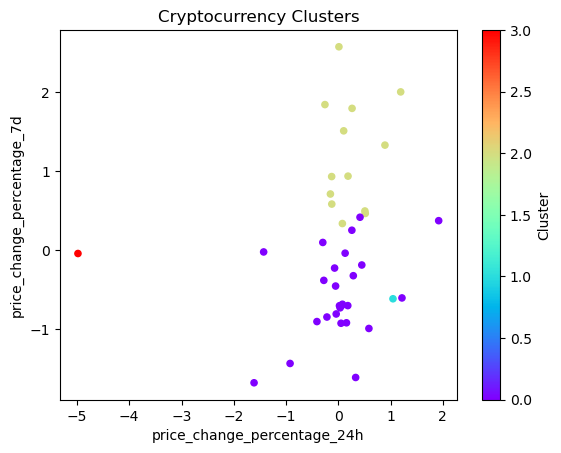

In [15]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

clustered_crypto_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    colormap="rainbow",
    title="Cryptocurrency Clusters"
)
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [16]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [17]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(scaled_market_data_df)

# Create a new DataFrame with the principal components
crypto_pca_df = pd.DataFrame(
    crypto_pca,
    columns=["PC1", "PC2", "PC3"],
    index=scaled_market_data_df.index
)

# View the first five rows of the DataFrame. 
crypto_pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [18]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")

Explained variance ratio: [0.3719856  0.34700813 0.17603793]


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

---

**Answer:** 

The explained variance ratio for the three principal components is as follows:

- **PC1**: 37.20% of the variance  
- **PC2**: 34.70% of the variance  
- **PC3**: 17.60% of the variance  

---

The total explained variance by the three principal components is **89.50%**.  

This means that the three principal components capture the majority of the information in the original dataset, making it an effective dimensionality reduction for further analysis.



In [19]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_crypto_df = pd.DataFrame(
    crypto_pca, 
    columns=["PCA1", "PCA2", "PCA3"],
    index=scaled_market_data_df.index
)

# Copy the crypto names from the original data
pca_crypto_df["Crypto_Name"] = market_data_df.index

# Set the coinid column as index


# Display sample data
pca_crypto_df.head()

,PCA1,PCA2,PCA3,Crypto_Name
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,bitcoin
ethereum,-0.458261,0.458466,0.952877,ethereum
tether,-0.433070,-0.168126,-0.641752,tether
ripple,-0.471835,-0.222660,-0.479053,ripple
bitcoin-cash,-1.157800,2.041209,1.859715,bitcoin-cash


### Find the Best Value for k Using the PCA Data

In [20]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
pca_inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=1)
    kmeans.fit(pca_crypto_df[["PCA1", "PCA2", "PCA3"]])
    pca_inertia_values.append(kmeans.inertia_)

# Create a DataFrame for the Elbow Curve data
elbow_data_pca = {"k": list(k_values), "inertia": pca_inertia_values}
elbow_df_pca = pd.DataFrame(elbow_data_pca)


# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values, "inertia": pca_inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)


# Display the DataFrame
elbow_df_pca

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


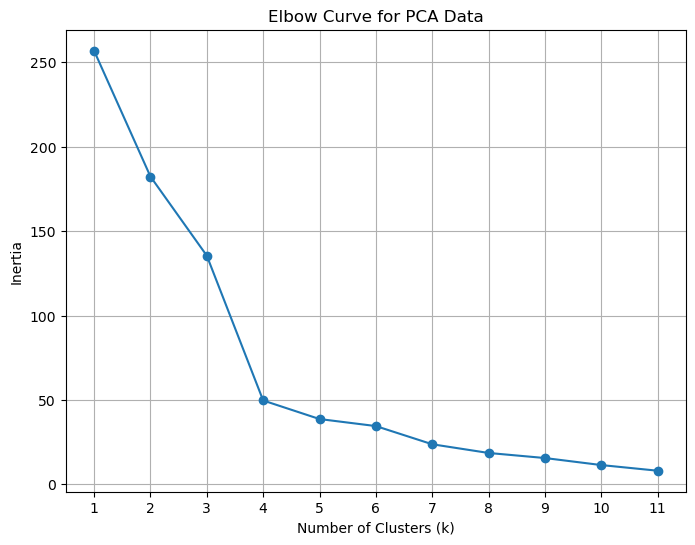

In [21]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"], marker='o')
plt.title("Elbow Curve for PCA Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [22]:
# Calculate percentage change in inertia
elbow_df_pca["percentage_change"] = elbow_df_pca["inertia"].diff() / elbow_df_pca["inertia"] * -100

# Display the updated DataFrame
print(elbow_df_pca)

# Find the largest percentage change to determine the elbow point
optimal_k_index = elbow_df_pca["percentage_change"].idxmax()
optimal_k = elbow_df_pca.loc[optimal_k_index, "k"]

print(f"The optimal k value is {optimal_k}")

     k     inertia  percentage_change
0    1  256.874086                NaN
1    2  182.339530          40.876795
2    3  135.442408          34.625139
3    4   49.665497         172.709258
4    5   38.672582          28.425602
5    6   34.507577          12.069829
6    7   23.728365          45.427537
7    8   18.574523          27.746829
8    9   15.572672          19.276404
9   10   11.407667          36.510584
10  11    8.058822          41.555015
The optimal k value is 4


#### Answer the following questions: 

---

* **Question:** What is the best value for `k` when using the PCA data?  
  * **Answer:** The best value for `k` when using the PCA data is **4**, as indicated by the elbow in the inertia curve and the significant percentage change.
----

* **Question:** Does it differ from the best `k` value found using the original data?  
  * **Answer:** No, the best value for `k` remains the same at **4**, whether using the PCA-reduced data or the original scaled data. This consistency reinforces the reliability of the clustering approach.



### Cluster Cryptocurrencies with K-means Using the PCA Data

In [23]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [24]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_crypto_df[["PCA1", "PCA2", "PCA3"]])

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [25]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(pca_crypto_df[["PCA1", "PCA2", "PCA3"]])

# Print the resulting array of cluster values
clusters_pca


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [26]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_crypto_df = pca_crypto_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_crypto_df["Cluster"] = clusters_pca

# Display sample data
clusters_pca

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [27]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

# Create a scatter plot using hvPlot
scatter_plot = clustered_pca_crypto_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="Cluster",
    colormap="rainbow",
    size=100,
    alpha=0.8,
    title="Cryptocurrency Clusters (PCA)"
)

# Display the scatter plot
scatter_plot

:Scatter   [PCA1]   (PCA2,Cluster)

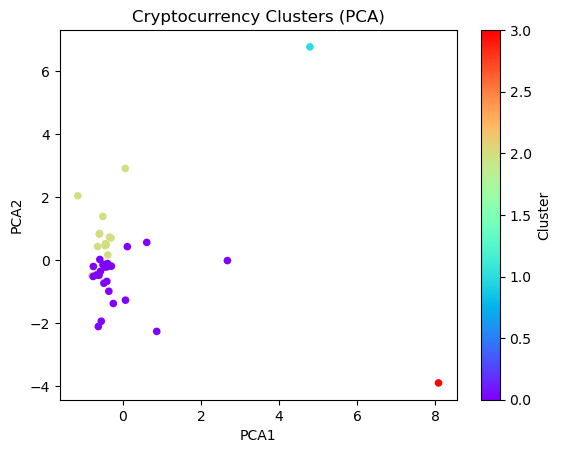

In [28]:
# Create a scatter plot
scatter_plot = clustered_pca_crypto_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="Cluster",
    colormap="rainbow",
    title="Cryptocurrency Clusters (PCA)"
)

### Answer the following question:

---

**Question:**
What is the impact of using fewer features to cluster the data using K-Means?

---

**Answer:**
Using fewer features to cluster the data with K-Means has several effects:

1. **Faster and More Efficient**: Reducing the number of features makes the clustering process faster and less computationally intensive. This is especially helpful when working with large datasets.

2. **Focus on Key Patterns**: By reducing the data to its most important components (like using PCA), the clustering focuses on the strongest patterns in the data, which can lead to clearer and more meaningful clusters.

3. **Simpler to Visualize**: With fewer dimensions, it becomes much easier to plot and understand the clusters. For example, using two or three principal components allows us to create visual scatter plots that reveal the relationships between clusters.

4. **Risk of Losing Some Details**: While fewer features simplify the data, some subtle details might be lost in the process. This could potentially impact the accuracy of the clusters for very fine-grained data.

5. **Reduces Noise**: By focusing only on the most important features, clustering is less likely to be affected by irrelevant or noisy data, leading to more robust results.

In summary, using fewer features helps make clustering faster, easier to interpret, and focused on the most important aspects of the data, but it may sacrifice some smaller details.

---




### Determine the Weights of Each Feature on each Principal Component

In [29]:
# Use the columns from the original scaled DataFrame as the index.

# Create a DataFrame with the PCA components
pca_weights_df = pd.DataFrame(
    pca.components_.T,  # Transpose to align features with rows
    columns=["PC1", "PC2", "PC3"],
    index=scaled_market_data_df.columns
)

# Display the PCA weights DataFrame
pca_weights_df

,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


### Principal Component Analysis (PCA) Feature Weights

The table below shows how each original feature contributes to the three principal components (PC1, PC2, PC3). Each value represents the weight or influence of the feature on the respective principal component. Positive weights indicate a positive correlation with the component, while negative weights indicate a negative correlation.

| Feature                        | PC1      | PC2      | PC3      |
|--------------------------------|----------|----------|----------|
| **price_change_percentage_24h** | -0.4167  |  0.3582  | -0.2188  |
| **price_change_percentage_7d**  | -0.1024  |  0.2274  |  0.7877  |
| **price_change_percentage_14d** | -0.0092  |  0.5404  |  0.3495  |
| **price_change_percentage_30d** |  0.1915  |  0.5622  | -0.1817  |
| **price_change_percentage_60d** |  0.3204  |  0.4340  | -0.3614  |
| **price_change_percentage_200d**|  0.5945  |  0.0277  |  0.0397  |
| **price_change_percentage_1y**  |  0.5684  | -0.1508  |  0.2105  |

---

### Key Observations:

1. **Principal Component 1 (PC1):**
   - Strong **positive influence**: `price_change_percentage_200d` (0.5945) and `price_change_percentage_1y` (0.5684).
   - Strong **negative influence**: `price_change_percentage_24h` (-0.4167).
   - PC1 appears to emphasize long-term trends like the 200-day and 1-year price changes.

2. **Principal Component 2 (PC2):**
   - Strong **positive influence**: `price_change_percentage_30d` (0.5622) and `price_change_percentage_14d` (0.5404).
   - Relatively weaker contributions from short-term metrics like `price_change_percentage_24h` (0.3582).
   - PC2 is influenced by mid-term price trends.

3. **Principal Component 3 (PC3):**
   - Strong **positive influence**: `price_change_percentage_7d` (0.7877).
   - Strong **negative influence**: `price_change_percentage_60d` (-0.3614).
   - PC3 highlights short-term volatility, particularly within a 7-day window.

---

### Interpretation:
Each principal component captures different aspects of the data:
- **PC1** focuses on long-term price trends.
- **PC2** emphasizes mid-term price movements.
- **PC3** highlights short-term volatility.

These components simplify the dataset while retaining the most significant variations, allowing for easier clustering and analysis.




    

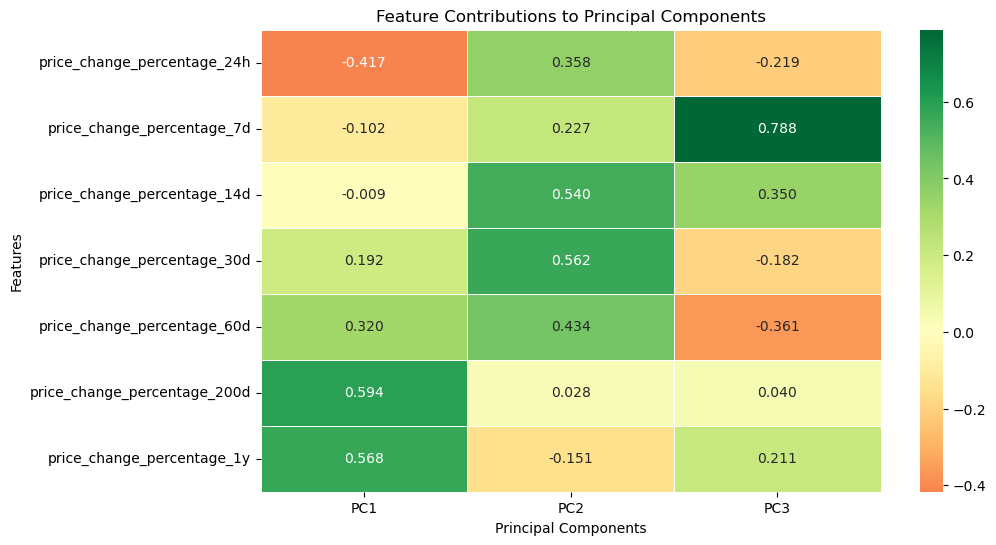

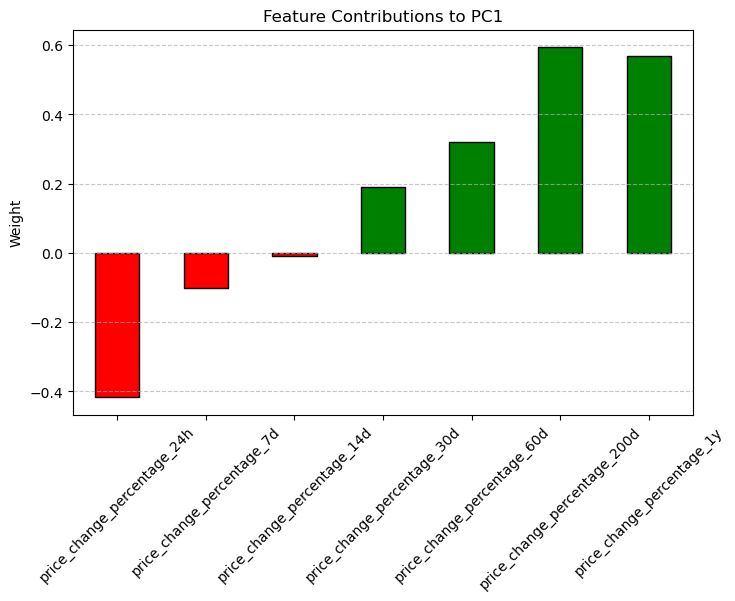

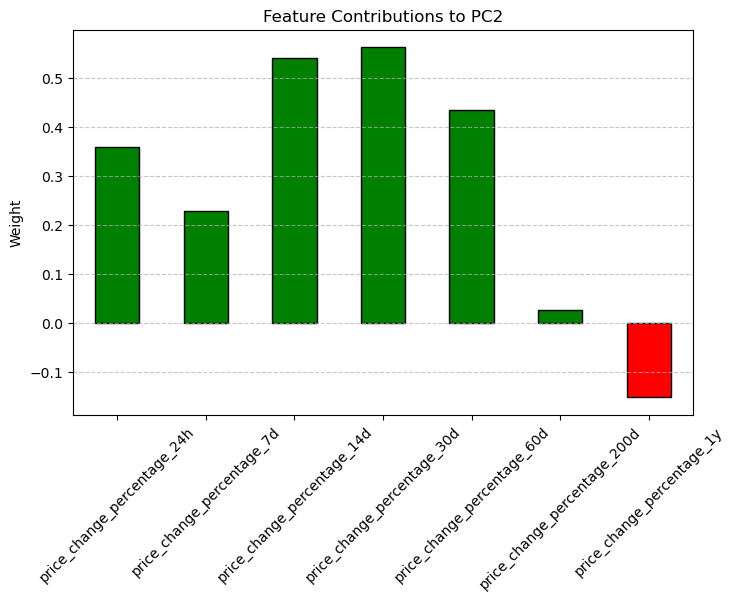

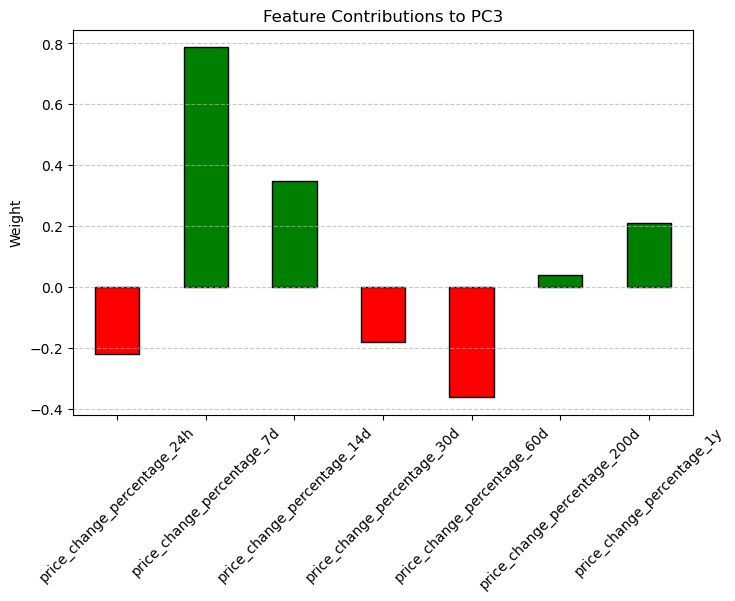

In [30]:
# Heatmap of the PCA weights with red for negative and green for positive contributions
plt.figure(figsize=(10, 6))
sns.heatmap(
    pca_weights_df,
    annot=True,
    cmap="RdYlGn",  # Gradient of red (negative) to green (positive)
    fmt=".3f",
    linewidths=0.5,
    center=0  # Ensures 0 is the midpoint of the color gradient
)
plt.title("Feature Contributions to Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Features")
plt.show()

# Bar plots with custom colors for positive (green) and negative (red) contributions
for pc in pca_weights_df.columns:
    plt.figure(figsize=(8, 5))
    colors = pca_weights_df[pc].apply(lambda x: 'green' if x > 0 else 'red')
    pca_weights_df[pc].plot(
        kind="bar", 
        color=colors, 
        edgecolor="black"
    )
    plt.title(f"Feature Contributions to {pc}")
    plt.ylabel("Weight")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
